<h1>Imports</h1>
First I am getting all the libraries that I will be needing to complete this project

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df=df.set_index("Serial No.")
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

I found out that there are no missing values so this dataset is already good to go into a ML model but before that I want to check out the dtypes of each column in the given dataset

In [21]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64')]

Again all of the datasetcolumn are numeric.

In [44]:
df.columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

<h2 style="font-size:300%;"> Visualisation</h2>

Now, I will use the function below to plot each of the column and understand their distributions,excoept for Research column for which I have used Countplot as the data is binary

In [32]:
def visualise_column(column):
    fig=plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    sns.distplot(df[column])
    ax.set_xlabel(column)
    plt.show()

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


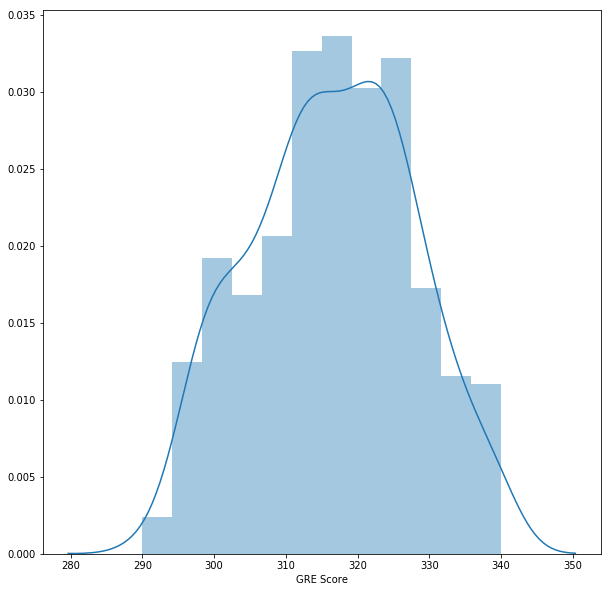

In [33]:
visualise_column("GRE Score")

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


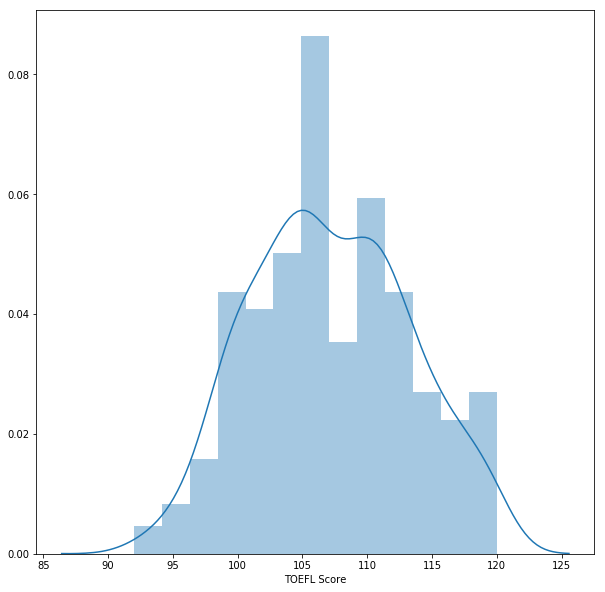

In [34]:
visualise_column("TOEFL Score")

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


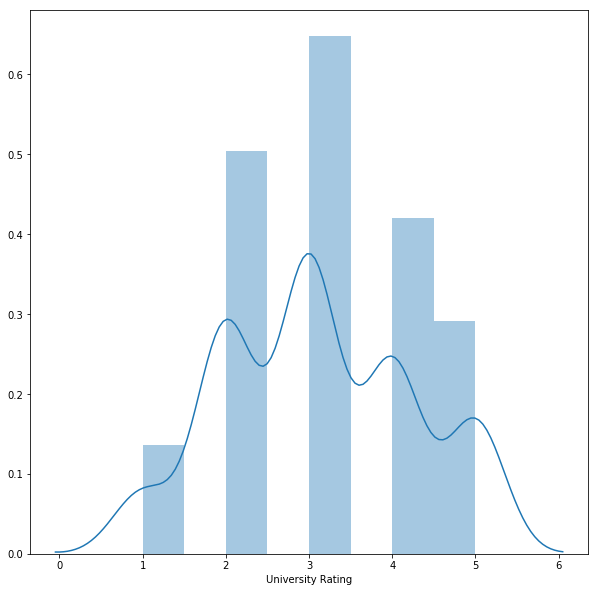

In [35]:
visualise_column("University Rating")

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


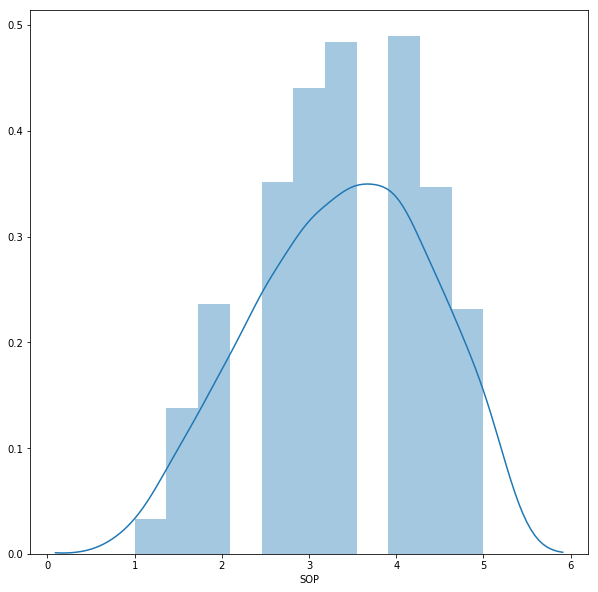

In [40]:
visualise_column("SOP")

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


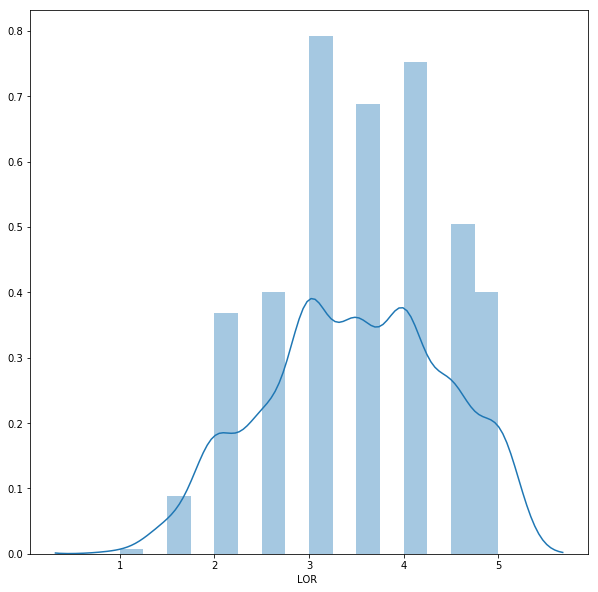

In [45]:
visualise_column('LOR ')

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


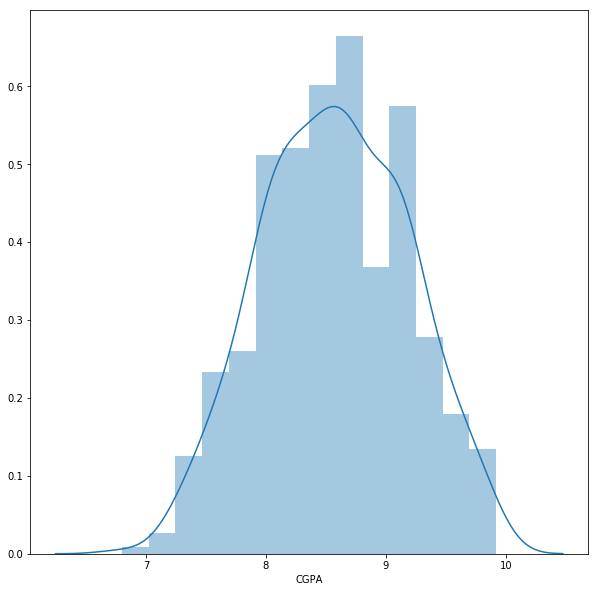

In [46]:
visualise_column('CGPA')

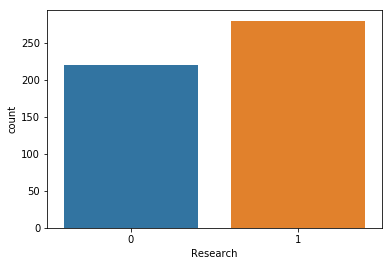

In [65]:
sns.countplot(x='Research',data=df)

<h3 style="font-size:300%;">Machine Learning Implementation</h3>

Now I have Tried to use different Regression model and tried to analyse their accuracy. The function Machine Learning is one time implementation of the whole training and testing for each mode. The metrics that I have used is R2 and Mean Squared Error. Further instead of using one train_test_split, I have used K-Fold Cross Validation ,where K=5 and I have given the scores for each of the Kth run.

In [81]:
def machine_learning(df,trainer,X,y):
    clf=trainer
    scores=cross_validate(trainer, X, y, cv=5,scoring=('r2', 'neg_mean_squared_error'))
    df_r2=pd.DataFrame()
    df_m=pd.DataFrame()
    df_r2["scores_r2"]=scores["test_r2"]
    df_m["scores_mean_squared_error"]=scores["test_neg_mean_squared_error"]
    return df_r2,df_m,scores

In [82]:
X=np.array(df.drop('Chance of Admit ',1))
y=np.array(df['Chance of Admit '])
df_r2,df_m,scores=machine_learning(df,GradientBoostingRegressor(),X,y)
scores

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.05596638, 0.04497409, 0.03798079, 0.0379796 , 0.0369792 ]),
 'score_time': array([0.00200248, 0.0019989 , 0.00100017, 0.00099993, 0.00099945]),
 'test_r2': array([0.64824523, 0.71608241, 0.86133469, 0.80801465, 0.87387092]),
 'train_r2': array([0.94334225, 0.93184484, 0.91046804, 0.91491306, 0.90932139]),
 'test_neg_mean_squared_error': array([-0.01069994, -0.00426416, -0.00173387, -0.00365421, -0.00228562]),
 'train_neg_mean_squared_error': array([-0.00094987, -0.00140499, -0.00192273, -0.00170115, -0.00183956])}

In [89]:
df_r2,df_m,scores=machine_learning(df,MLPRegressor(hidden_layer_sizes=(100,300,150),activation="tanh"),X,y)
scores

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([1.65804672, 1.50513482, 1.22529626, 1.55610704, 1.69402695]),
 'score_time': array([0.00399733, 0.00599813, 0.00400114, 0.00300384, 0.00300097]),
 'test_r2': array([0.58413182, 0.34610596, 0.64804783, 0.59455352, 0.57868177]),
 'train_r2': array([0.56463125, 0.63591362, 0.55114152, 0.60319152, 0.59793074]),
 'test_neg_mean_squared_error': array([-0.01265019, -0.00982083, -0.00440081, -0.00771718, -0.00763484]),
 'train_neg_mean_squared_error': array([-0.007299  , -0.00750547, -0.00963941, -0.00793342, -0.00815661])}

In [96]:
df_r2,df_m,scores=machine_learning(df,LinearRegression(),X,y)
scores

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00299835, 0.00099778, 0.00100112, 0.00100064, 0.0009985 ]),
 'score_time': array([0.00199938, 0.0010004 , 0.00099993, 0.        , 0.00099897]),
 'test_r2': array([0.67763918, 0.79424809, 0.86447645, 0.81935698, 0.89828691]),
 'train_r2': array([0.86985534, 0.82162443, 0.81191146, 0.82031181, 0.80347137]),
 'test_neg_mean_squared_error': array([-0.00980581, -0.00309019, -0.00169459, -0.00343832, -0.00184317]),
 'train_neg_mean_squared_error': array([-0.00218189, -0.00367713, -0.00403928, -0.00359252, -0.00398689])}

In [97]:
df_r2,df_m,scores=machine_learning(df,Ridge(),X,y)
scores

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.34950542, 0.00099993, 0.00099945, 0.00099897, 0.        ]),
 'score_time': array([0.00098372, 0.        , 0.        , 0.00099945, 0.00099945]),
 'test_r2': array([0.67628388, 0.79404871, 0.86424801, 0.81910992, 0.89846786]),
 'train_r2': array([0.86978949, 0.82157826, 0.81186561, 0.82026373, 0.80341303]),
 'test_neg_mean_squared_error': array([-0.00984704, -0.00309318, -0.00169744, -0.00344302, -0.0018399 ]),
 'train_neg_mean_squared_error': array([-0.00218299, -0.00367808, -0.00404026, -0.00359348, -0.00398808])}

In [98]:
df_r2,df_m,scores=machine_learning(df,Lasso(),X,y)
scores

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.07397914, 0.        , 0.        , 0.00099945, 0.00100112]),
 'score_time': array([0.        , 0.00099921, 0.00099802, 0.        , 0.        ]),
 'test_r2': array([0.0845657 , 0.19105773, 0.27694783, 0.25122038, 0.27164623]),
 'train_r2': array([0.22061574, 0.26182364, 0.30122613, 0.24761143, 0.26879985]),
 'test_neg_mean_squared_error': array([-0.02784637, -0.0121495 , -0.00904104, -0.01425211, -0.01319872]),
 'train_neg_mean_squared_error': array([-0.01306645, -0.01521717, -0.01500644, -0.01504255, -0.01483355])}

<h4 style="font-size:300%;"> HEATMAP </h4>

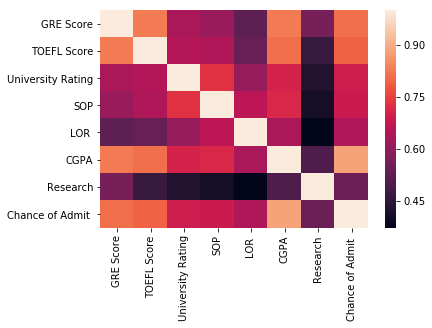

In [91]:
sns.heatmap(df.corr())#Just a heatmap to have final analysis